# Lineshapes for $D^0\to K^0_S\pi^+\pi^-$

In this notebook, various lineshapes to study the $D^0\to K^0_S\pi^+\pi^-$ decay are implemented. The lineshapes are:

- $K^*(892)^-$
- $K_0^*(1430)^-$ 
- $K_2^*(1430)^-$
- $K^*(1410)^-$
- $K^*(1680)^-$
- $\rho(770)$
- $\omega(782)$
- $f_2(1270)$
- $\rho(1450)$
- ππ S wave

In [1]:
# Import AmpliTF modules
import amplitf.interface as atfi
import amplitf.kinematics as atfk
import amplitf.dynamics as atfd
import amplitf.likelihood as atfl
from amplitf.phasespace.dalitz_phasespace import DalitzPhaseSpace

# Import TFA modules
import tfa.toymc as tft
import tfa.plotting as tfp
import tfa.optimisation as tfo

2025-02-10 16:01:06.321757: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


In [6]:
# Masses of final state particles
from particle.particle import literals as lp
# Dalitz Particles
mkz = atfi.const(lp.K_S_0.mass/1000)
mpi = atfi.const(lp.pi_plus.mass/1000)
md = atfi.const(lp.D_0.mass/1000)

# Resonances
mkst = atfi.const(lp.Kst_892_0.mass/1000)
wkst = atfi.const(lp.Kst_892_0.width/1000)
mrho = atfi.const(lp.rho_770_0.mass/1000)
wrho = atfi.const(lp.rho_770_0.width/1000)
mk0st1430 = atfi.const(lp.K_0st_1430_plus.mass/1000)
wk0st1430 = atfi.const(lp.K_0st_1430_plus.width/1000)
mk2st1430 = atfi.const(lp.K_2st_1430_plus.mass/1000)
wk2st1430 = atfi.const(lp.K_2st_1430_plus.width/1000)
mkst1410 = atfi.const(lp.Kst_1410_plus.mass/1000)
wkst1410 = atfi.const(lp.Kst_1410_plus.width/1000)
mkst1680 = atfi.const(lp.Kst_1680_plus.mass/1000)
wkst1680 = atfi.const(lp.Kst_1680_plus.width/1000)
momega = atfi.const(lp.omega_782.mass/1000)
womega = atfi.const(lp.omega_782.width/1000)
mf2_1270 = atfi.const(lp.f_2_1270.mass/1000)
wf2_1270 = atfi.const(lp.f_2_1270.width/1000)
mrho1450 = atfi.const(lp.rho_1450_0.mass/1000)
wrho1450 = atfi.const(lp.rho_1450_0.width/1000)

# Blatt-Weisskopf radii for Breit-Wigner lineshape
rd = atfi.const(5.0)
rr = atfi.const(1.5)

In [3]:
phsp = DalitzPhaseSpace(mpi, mkz, mpi, md)

generate plotting sample

In [5]:
nnorm=100000
norm_sample = phsp.uniform_sample(nnorm)

In [17]:
def bw(m2, coshel, mass, width, spin, masses=[mpi, mpi, mkz]):
    #m2 = phsp.__getattribute__('m2'+particles)(x)
    bw = atfd.breit_wigner_lineshape(m2, mass, width, masses[0], masses[1], masses[2], md, rd, rr, 1, 1)
    #coshel = phsp.__getattribute__('cos_helicity_'+particles)(x)
    helamp = atfd.helicity_amplitude(coshel, spin)
    return atfd.density(bw*helamp)

In [55]:
masses_ab = masses_bc = [mpi, mkz, mpi]
masses_ac = [mpi, mpi, mkz]

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.integrate import trapezoid


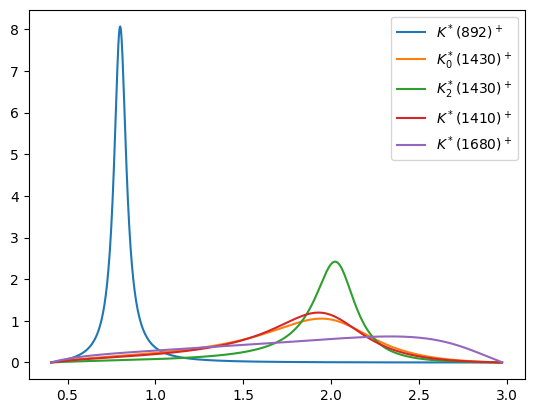

In [80]:
xpl = np.linspace(np.min(phsp.m2ab(norm_sample)), np.max(phsp.m2ab(norm_sample)), 1000)
ykst = atfd.density(atfd.breit_wigner_lineshape(xpl, mkst, wkst, masses_ab[0], masses_ab[1], masses_ab[2], md, rd, rr, 1, 1))
yk0st1430 = atfd.density(atfd.breit_wigner_lineshape(xpl, mk0st1430, wk0st1430, masses_ab[0], masses_ab[1], masses_ab[2], md, rd, rr, 1, 1))
yk2st1430 = atfd.density(atfd.breit_wigner_lineshape(xpl, mk2st1430, wk2st1430, masses_ab[0], masses_ab[1], masses_ab[2], md, rd, rr, 1, 1))
ykst1410 = atfd.density(atfd.breit_wigner_lineshape(xpl, mkst1410, wkst1410, masses_ab[0], masses_ab[1], masses_ab[2], md, rd, rr, 1, 1))
ykst1680 = atfd.density(atfd.breit_wigner_lineshape(xpl, mkst1680, wkst1680, masses_ab[0], masses_ab[1], masses_ab[2], md, rd, rr, 1, 1))
int_kst = trapezoid(ykst, xpl)
int_k0st1430 = trapezoid(yk0st1430, xpl)
int_k2st1430 = trapezoid(yk2st1430, xpl)
int_kst1410 = trapezoid(ykst1410, xpl)
int_kst1680 = trapezoid(ykst1680, xpl)
plt.plot(xpl, ykst / int_kst, label=r'$K^*(892)^+$')
plt.plot(xpl, yk0st1430 / int_k0st1430, label=r'$K_0^*(1430)^+$')
plt.plot(xpl, yk2st1430 / int_k2st1430, label=r'$K_2^*(1430)^+$')
plt.plot(xpl, ykst1410 / int_kst1410, label=r'$K^*(1410)^+$')
plt.plot(xpl, ykst1680 / int_kst1680, label=r'$K^*(1680)^+$')
plt.legend()

There is a problem in the relativistic breit wigner lineshape at low masses. FIXED: order of particles in `phsp` and `masses` were different.

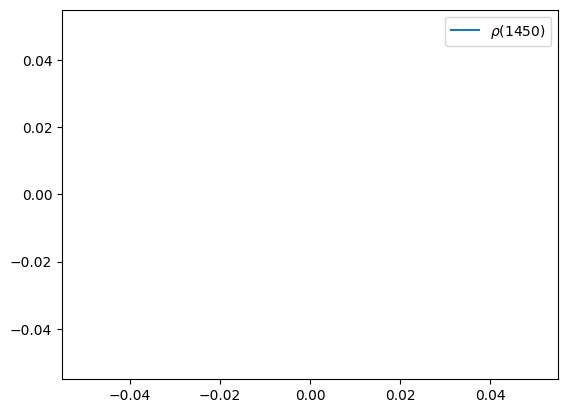

In [82]:
xpl = np.linspace(np.min(phsp.m2ac(norm_sample)), np.max(phsp.m2ac(norm_sample)), 1000)
yrho = atfd.density(atfd.breit_wigner_lineshape(xpl, mrho, wrho, masses_ac[0], masses_ac[1], masses_ac[2], md, rd, rr, 1, 1))
yomega = atfd.density(atfd.breit_wigner_lineshape(xpl, momega, womega, *masses_ac, md, rd, rr, 1, 1))
yf2_1270 = atfd.density(atfd.breit_wigner_lineshape(xpl, mf2_1270, wf2_1270, *masses_ac, md, rd, rr, 1, 1))
yrho1450 = atfd.density(atfd.breit_wigner_lineshape(xpl, mrho1450, wrho1450, *masses_ac, md, rd, rr, 1, 1))
int_rho = trapezoid(yrho, xpl)
int_omega = trapezoid(yomega, xpl)
int_f2_1270 = trapezoid(yf2_1270, xpl)
int_rho1450 = trapezoid(yrho1450, xpl)
# plt.plot(xpl, yrho / int_rho, label=r'$\rho(770)$')
# plt.plot(xpl, yomega / int_omega, label=r'$\omega(782)$')
# plt.plot(xpl, yf2_1270 / int_f2_1270, label=r'$f_2(1270)$')
plt.plot(xpl, yrho1450 / int_rho1450, label=r'$\rho(1450)$')
plt.legend()

In [88]:
breit_wigner_lineshape_test(xpl[0], mrho1450, wrho1450, *masses_ac, md, rd, rr, 1, 1)

0.2792773326103535 0.8418248616761006 nan 0.004366161098310467 0.7190802154386171
3.7309884380308 nan
6.5384827526719405e-06 (0.4835054131153679+2.239325823948267e-06j)
0.006071869319401649 nan


<tf.Tensor: shape=(), dtype=complex128, numpy=(nan+nanj)>

In [86]:
@atfi.function
def breit_wigner_lineshape_test(
    m2,
    m0,
    gamma0,
    ma,
    mb,
    mc,
    md,
    dr,
    dd,
    lr,
    ld,
    barrier_factor=True,
    ma0=None,
    md0=None,
):
    r"""Breit-Wigner amplitude with Blatt-Weisskopf form factors, mass-dependent width and orbital barriers

        .. math::

            BW(m^2) = \frac{1}{m_{res}^2 - m^2 - i m_{res} \Gamma(m, m_{res}, \Gamma_{res}, p, p_0, FF_r, l_r)} FF_r FF_d

            
        if barrier_factor is True, the orbital barrier factors are included in the form factor

        .. math::

            BW(m^2) = \frac{1}{m_{res}^2 - m^2 - i m_{res} \Gamma(m, m_{res}, \Gamma_{res}, p, p_0, FF_r, l_r)} FF_r FF_d B_r B_d

        
        where
            - :math:`\Gamma(m, m_{res}, \Gamma_{res}, p, p_0, FF_r, l_r)` is the mass-dependent width
            - :math:`FF_r = BWFF(p, p_0, d_r, l_r)` is the Blatt-Weisskopf form factor for the resonance
            - :math:`FF_d = BWFF(p, p_0, d_d, l_d)` is the Blatt-Weisskopf form factor for the decay
            - :math:`B_r = B_l(p, p_0, l_r)` is the orbital barrier factor for the resonance
            - :math:`B_d = B_l(q, q_0, l_d)` is the orbital barrier factor for the decay

    Args:
        m2 (float): invariant mass squared of the system
        m0 (float): resonance mass
        gamma0 (float): resonance width
        ma (float): mass of particle a
        mb (float): mass of particle b
        mc (float): mass of the other particle (particle c)
        md (float): mass of the decaying particle
        dr (float): barrier radius for the resonance
        dd (float): barrier radius for the decay
        lr (int): orbital angular momentum of the resonance
        ld (int): orbital angular momentum of the decay
        barrier_factor (bool, optional): multiplies the form factor for the barrier factors. Defaults to True.
        ma0 (float, optional): alternative value for the mass of the decaying particle to calculate the momentum of the system assuming the resonance mass. Defaults to None.
        md0 (float, optional): alternative value for the mass of the decaying particle to calculate the q-value of the system assuming the resonance mass. Defaults to None.

    Returns:
        complex: the Breit-Wigner amplitude
    """
    m = atfi.sqrt(m2)
    q = atfk.two_body_momentum(md, m, mc)
    q0 = atfk.two_body_momentum(md if md0 is None else md0, m0, mc)
    p = atfk.two_body_momentum(m, ma, mb)
    p0 = atfk.two_body_momentum(m0, ma if ma0 is None else ma0, mb)
    print(m.numpy(), q.numpy(), q0.numpy(), p.numpy(), p0.numpy())
    ffr = atfd.blatt_weisskopf_ff(p, p0, dr, lr)
    ffd = atfd.blatt_weisskopf_ff(q, q0, dd, ld)
    print(ffr.numpy(), ffd.numpy())
    width = atfd.mass_dependent_width(m, m0, gamma0, p, p0, ffr, lr)
    bw = atfd.relativistic_breit_wigner(m2, m0, width)
    print(width.numpy(), bw.numpy())
    ff = ffr * ffd
    if barrier_factor:
        b1 = atfd.orbital_barrier_factor(p, p0, lr)
        b2 = atfd.orbital_barrier_factor(q, q0, ld)
        ff *= b1 * b2
        print(b1.numpy(), b2.numpy())
    return bw * atfi.complex(ff, atfi.const(0.0))

In [90]:
print(md, mrho1450, masses_ac[2])

tf.Tensor(1.8648399999999998, shape=(), dtype=float64) tf.Tensor(1.465, shape=(), dtype=float64) tf.Tensor(0.49761099999999997, shape=(), dtype=float64)


needs to understand how to setup q0 for the resonances outside phase space.